<a href="https://colab.research.google.com/github/Pataraphorn/StyleTransfer/blob/main/Test/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# use in colab
!git clone https://github.com/Pataraphorn/StyleTransfer.git clone

%cd clone/Test
!ls

# Experiments

In [1]:
import main as m
import utils as fn
import model
import matplotlib.pyplot as plt
import os


In [2]:
def allM(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH):
    POOL = 'max' # or 'avg'
    VGG = model.VGG19(pool=POOL)

    METHOD = 'before' # or 'after'
    COLOR = None # or 'histogram' or 'luminance'
    
    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/max_before_no_fig1.jpg')

    METHOD = 'before' # or 'after'
    COLOR = 'histogram'

    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/max_before_histogram_fig2.jpg')

    METHOD = 'before' # or 'after'
    COLOR = 'luminance'

    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/max_before_luminance_fig3.jpg')

    METHOD = 'after'
    COLOR = 'histogram'

    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/max_after_histogram_fig4.jpg')

    METHOD = 'after'
    COLOR = 'luminance'

    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/max_after_luminance_fig5.jpg')

In [3]:
def allA(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH):
    POOL = 'avg' # or 'avg'
    VGG = model.VGG19(pool=POOL)

    METHOD = 'before' # or 'after'
    COLOR = None # or 'histogram' or 'luminance'
    
    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/avg_before_no_fig6.jpg')

    METHOD = 'before' # or 'after'
    COLOR = 'histogram'

    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/avg_before_histogram_fig7.jpg')

    METHOD = 'before' # or 'after'
    COLOR = 'luminance'

    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/avg_before_luminance_fig8.jpg')

    METHOD = 'after'
    COLOR = 'histogram'

    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/avg_after_histogram_fig9.jpg')

    METHOD = 'after'
    COLOR = 'luminance'

    result = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
    fn.FImg.save(result, BASE_PATH+'/avg_after_luminance_fig10.jpg')

In [4]:
ADAM_LR = 0.03 
NUM_EPOCHS = 300
# STYLE_WEIGHT = 100
# CONTENT_WEIGHT = 10
IMG_SIZE = (224,224)

# Chakrabhan
STYLE_WEIGHT = 100
CONTENT_WEIGHT = 10

Sroot = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\StyleImage\Chakrabhan'
Croot = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\ContentImage\test0'
save = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\OutputTest\ChakrabhanOut'

num = 1

for pathS in os.listdir(Sroot):
    STYLE_IMG = os.path.join(Sroot,pathS)
    for pathC in os.listdir(Croot):
        CONTENT_IMG = os.path.join(Croot,pathC)
        BASE_PATH = os.path.join(save,str(num))
        os.mkdir(BASE_PATH)
        
        Style = fn.AImage(STYLE_IMG)
        Content = fn.AImage(CONTENT_IMG)
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,10)) 
        #Plotting content image   
        ax1.set_title('Content Image', fontsize=25)
        ax1.imshow(fn.FImg.resize(Content.Img, (1024,1024)))  
        ax1.axis('off')  
        #Plotting style image  
        ax2.set_title('Style Image', fontsize=25)
        ax2.imshow(fn.FImg.resize(Style.Img, (1024,1024)))
        ax2.axis('off')
        plt.savefig(BASE_PATH+'/Chakrahbunstyle_content.jpg', bbox_inches='tight', pad_inches=0.25)  
        plt.show()

        allM(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH)
        allA(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH)

        num = num+1


Load image from path :  C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\StyleImage\t1\0001.jpg
Load image from path :  C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\ContentImage\test1\001.jpg
C:\Users\mpata\Anaconda3\lib\site-packages\torchvision\transforms\functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


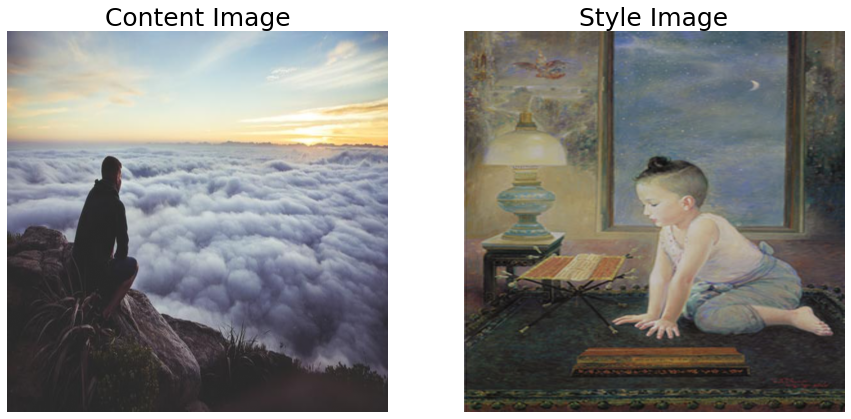

=> Using  cuda  to process
__CUDNN VERSION: 7605
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce GTX 950M
__CUDA Device Total Memory [GB]: 4.294967296
Load image from path :  C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\StyleImage\t1\0001.jpg
Load image from path :  C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\ContentImage\test1\001.jpg
=> Before style transfer
Do not use color preservation


KeyboardInterrupt: 

In [5]:
Sroot = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\StyleImage\t1'
Croot = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\ContentImage\test1'
save = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\OutputTest\Test1Out'
num = 1
for pathS in os.listdir(Sroot):
    STYLE_IMG = os.path.join(Sroot,pathS)
    for pathC in os.listdir(Croot):
        CONTENT_IMG = os.path.join(Croot,pathC)
        
        BASE_PATH = os.path.join(save,str(num))
        os.mkdir(BASE_PATH)
        if(num>=8):
            STYLE_WEIGHT = 100
            CONTENT_WEIGHT = 0.01
        else:
            STYLE_WEIGHT = 100
            CONTENT_WEIGHT = 10
        
        Style = fn.AImage(STYLE_IMG)
        Content = fn.AImage(CONTENT_IMG)
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,10)) 
        #Plotting content image   
        ax1.set_title('Content Image', fontsize=25)
        ax1.imshow(fn.FImg.resize(Content.Img, (1024,1024)))  
        ax1.axis('off')  
        #Plotting style image  
        ax2.set_title('Style Image', fontsize=25)
        ax2.imshow(fn.FImg.resize(Style.Img, (1024,1024)))
        ax2.axis('off')
        plt.savefig(BASE_PATH+'/Chakrahbunstyle_content.jpg', bbox_inches='tight', pad_inches=0.25)  
        plt.show()

        allM(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH)
        allA(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH)

        num = num+1

In [ ]:
# Chalood
STYLE_WEIGHT = 100
CONTENT_WEIGHT = 0.01

Sroot = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\StyleImage\Chalood'
Croot = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\ContentImage\test'
save = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\OutputTest\ChaloodOut'
num = 1
for pathS in os.listdir(Sroot):
    STYLE_IMG = os.path.join(Sroot,pathS)
    for pathC in os.listdir(Croot):
        CONTENT_IMG = os.path.join(Croot,pathC)
        
        BASE_PATH = os.path.join(save,str(num))
        os.mkdir(BASE_PATH)
        
        Style = fn.AImage(STYLE_IMG)
        Content = fn.AImage(CONTENT_IMG)
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,10)) 
        #Plotting content image   
        ax1.set_title('Content Image', fontsize=25)
        ax1.imshow(fn.FImg.resize(Content.Img, (1024,1024)))  
        ax1.axis('off')  
        #Plotting style image  
        ax2.set_title('Style Image', fontsize=25)
        ax2.imshow(fn.FImg.resize(Style.Img, (1024,1024)))
        ax2.axis('off')
        plt.savefig(BASE_PATH+'/Chakrahbunstyle_content.jpg', bbox_inches='tight', pad_inches=0.25)  
        plt.show()

        allM(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH)
        allA(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH)

        num = num+1

STYLE_IMG = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\StyleImage\Chakrabhan\0178.jpg'
CONTENT_IMG = r'C:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\ContentImage\test1\001.jpg'
%cd c:\Users\mpata\OneDrive - King Mongkut’s University of Technology Thonburi (KMUTT)\StyleTransfer\Test\OutputTest
%mkdir output_001_0178
%cd output_001_0178

BASE_PATH = os.getcwd()

Style = fn.AImage(STYLE_IMG)
Content = fn.AImage(CONTENT_IMG)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,10)) 
#Plotting content image   
ax1.set_title('Content Image', fontsize=25)
ax1.imshow(fn.FImg.resize(Content.Img, (1024,1024)))  
ax1.axis('off')  
#Plotting style image  
ax2.set_title('Style Image', fontsize=25)
ax2.imshow(fn.FImg.resize(Style.Img, (1024,1024)))
ax2.axis('off')
plt.savefig(BASE_PATH+'/Chakrahbunstyle_content.jpg', bbox_inches='tight', pad_inches=0.25)  
plt.show()

allM(IMG_SIZE,STYLE_IMG,CONTENT_IMG,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT,BASE_PATH)
